# Artificial Neural Net Regression - TensorFlow Keras

### The Data

The data is taken from IBM cloud and contains details of car specifications and the price they were sold at. The task will be to conduct exploratory data analysis, preprocess the data and then build an artificial neural network to predict the price of a specified vehicle.  The ANN will be constructed using TensforFlow Keras library in Python. The model will then be evaluated in terms of its accuracy

### Workflow

- Loading and importing dataset
- Exploratory data analysis using seaborn visualisation library
- Preprocessing the data, addressing any missing data and categorical variables
- Splitting the data into training sets and testing sets and then scaling the features of each split
- Building the artificial neural network model
- Evaluate the model performance

### Import neccessary libraries

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import random

## Section 1: Loading and Importing Dataset

- import the data from ibm
- inspect the the vehicle pricing data

In [2]:
# import the data from ibm website
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# how many columns are there and what are they
print(df.columns.nunique())
df.columns

29


Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [4]:
# look at the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
# look at the statistical summary of df for the numeric columns
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


## Section 2: Exploratory Data Analysis using Seaborn

- Inspect relationships between features and the target variable
- Investigate relationships between variables
- Understand which variables are important
- Visualise the data with seaborn library

<AxesSubplot:>

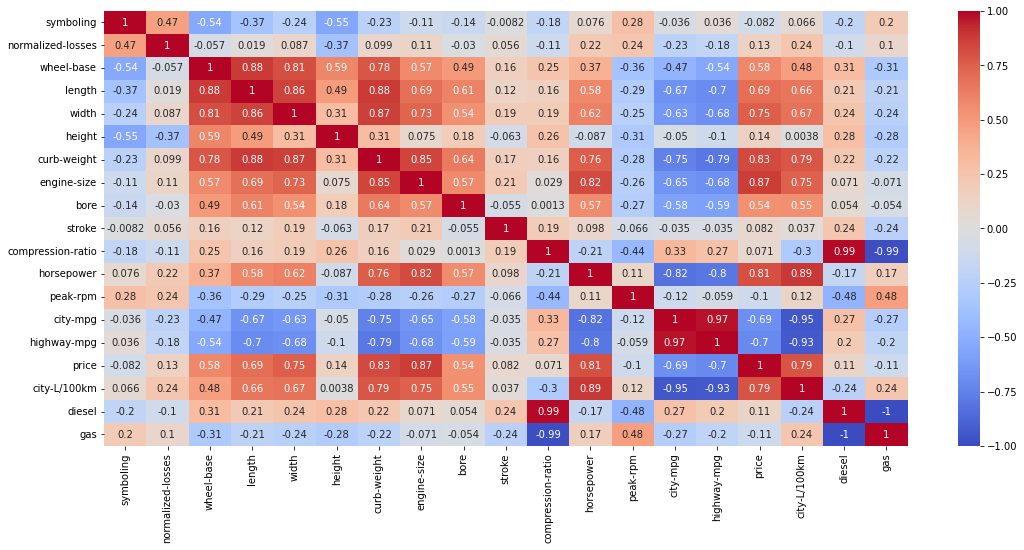

In [6]:
# create a heatmap showing the correlation of features
# remember that the categorical string variables are not included in df.corr() function
plt.figure(figsize=[18,8])
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

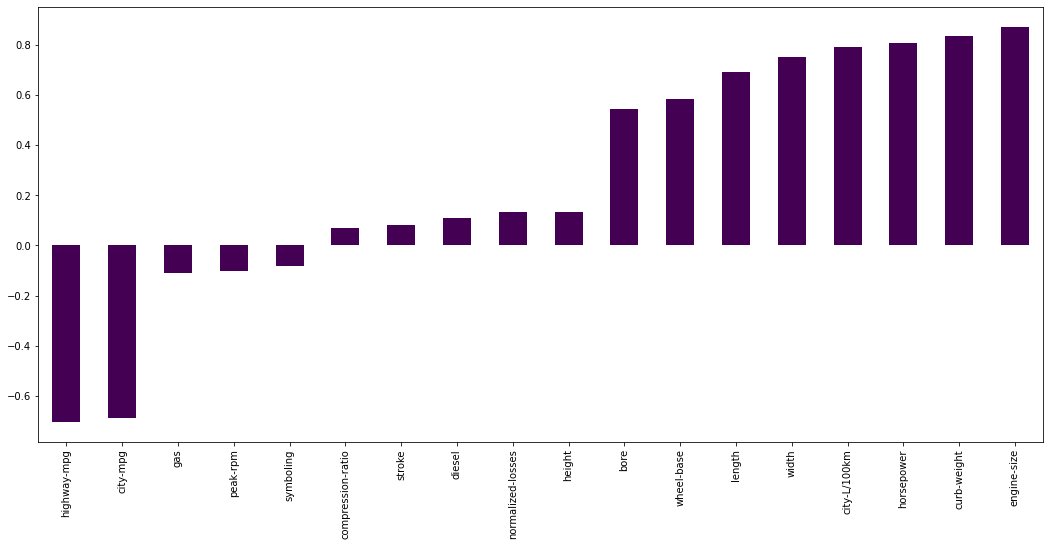

In [7]:
# create correlation breakdown for price and visualise
df.corr()['price'].sort_values()[:-1].plot(kind='bar', cmap='viridis', figsize=[18,8])

<AxesSubplot:xlabel='price', ylabel='Count'>

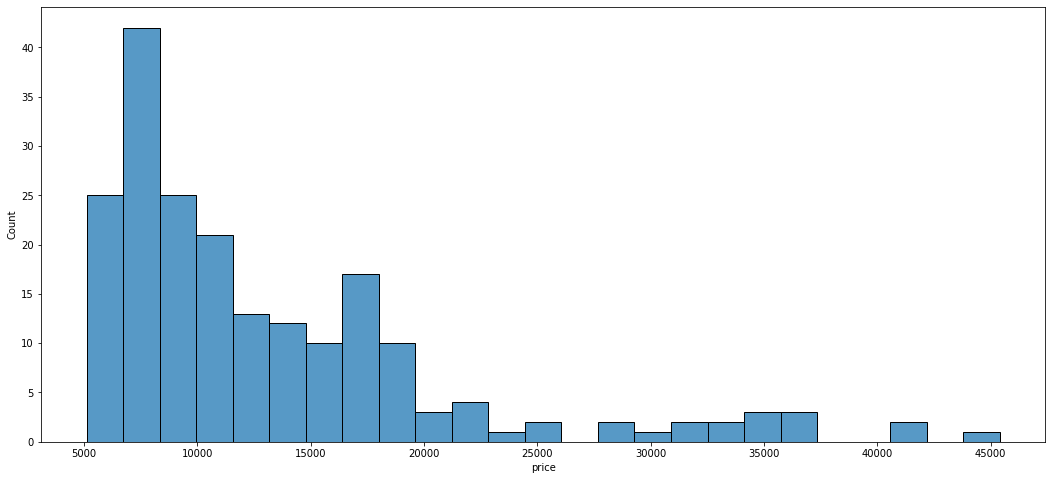

In [8]:
# show the distribution of price
plt.figure(figsize=[18,8])
sns.histplot(data=df, x='price', bins=25)

<AxesSubplot:xlabel='make', ylabel='count'>

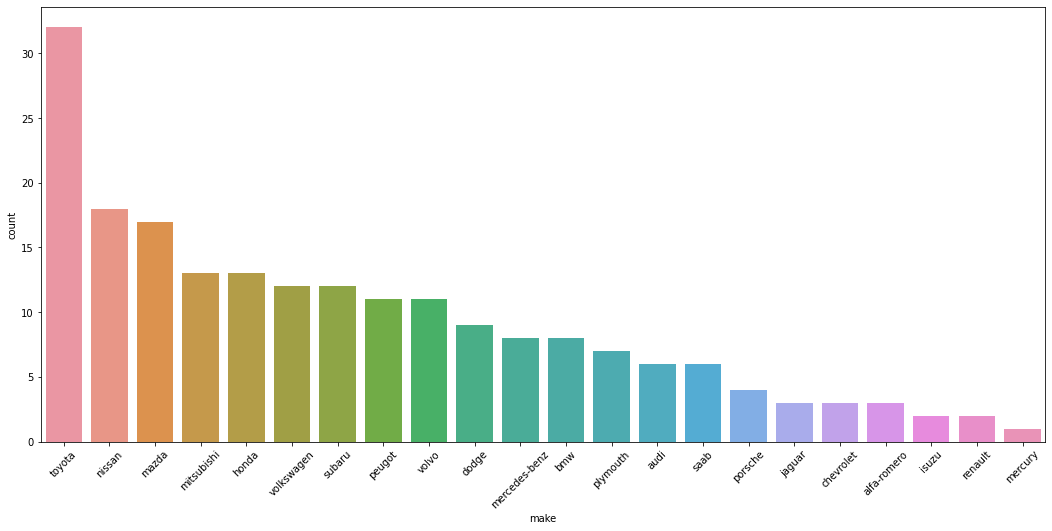

In [9]:
# create a countplot for each make of vehicle
# create an order for the variables
order = df.groupby('make').count().sort_values('symboling', ascending=False).index
plt.figure(figsize=[18,8])
plt.xticks(rotation=45)
sns.countplot(data=df, x='make', order=order)

Here we can see the japanese vehicle manufacturers have a higher percent of market share. We could feature engineer this and create a breakdown by country.

<Figure size 1296x576 with 0 Axes>

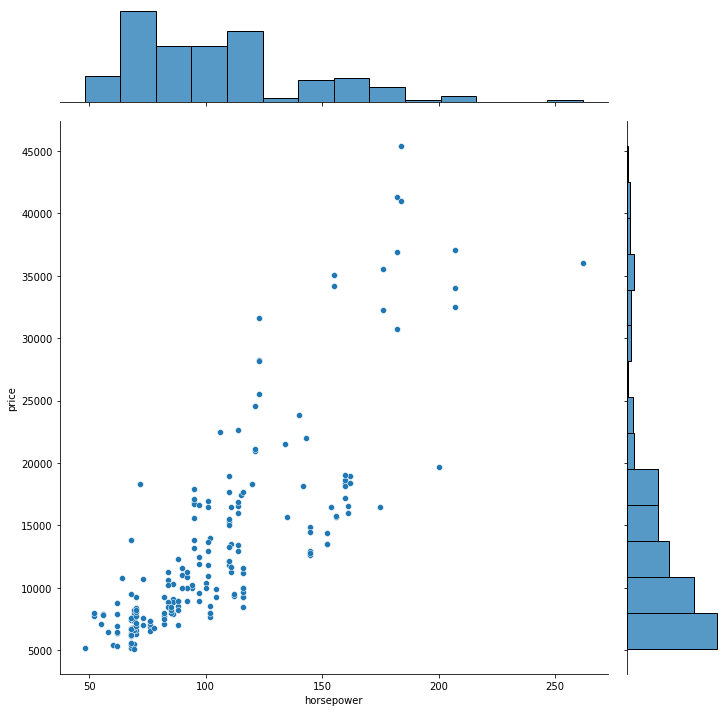

In [10]:
# create a jointplot comparing horse power vs price
plt.figure(figsize=[18,8])
sns.jointplot(data=df, x='horsepower', y='price', height=10)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

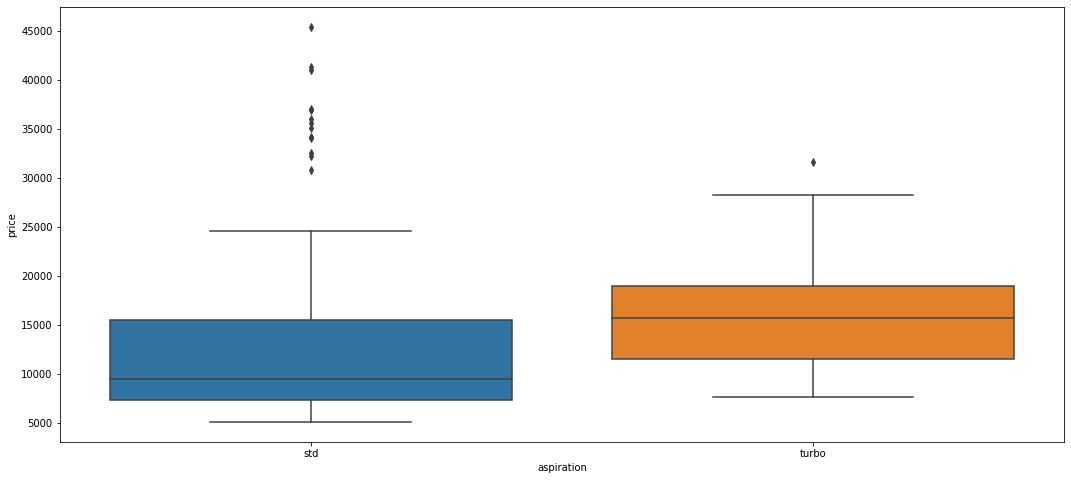

In [11]:
# create a boxplot showing aspiration vs price
plt.figure(figsize=[18,8])
sns.boxplot(data=df, x='aspiration', y='price')

This makes sense because vehicles with a turbo increase horsepower which has a high correlation with price. People pay more for vehicles with more power. Moreover, more powerful vehicle require more robust designs which require more materials etc.

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

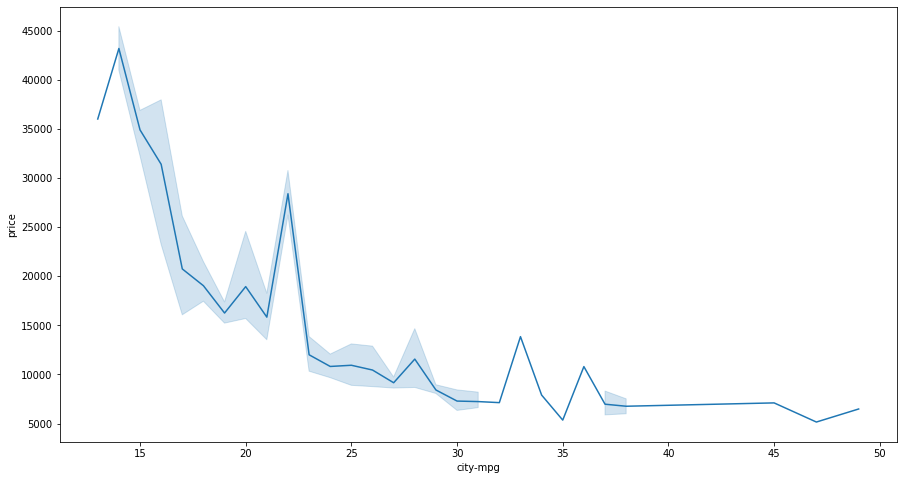

In [12]:
# visualise the fuel efficiency vs price
plt.figure(figsize=[15,8])
sns.lineplot(data=df, x='city-mpg', y='price')

<AxesSubplot:xlabel='diesel', ylabel='price'>

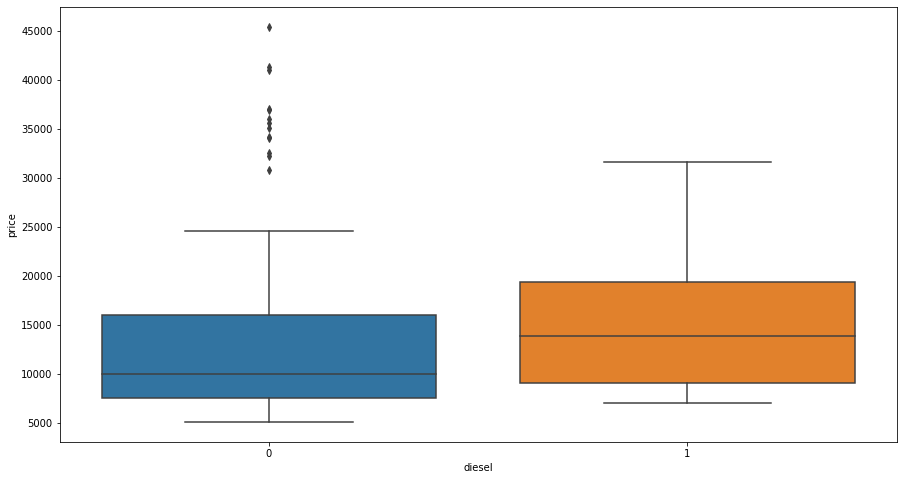

In [13]:
# are diesels or petrol vehicles more expensive?
plt.figure(figsize=[15,8])
sns.boxplot(data=df, x='diesel', y='price')

## Section 3: Preprocessing the Data, Addressing any Missing Data and Categorical Variables

- Is there any missing data? Will we replace it or remove it? How will we decide this? How will we replace it?
- Removed uneccessary or repetitive features
- Convert categorical string features to dummy variables

symboling            0.000000
normalized-losses    0.000000
make                 0.000000
aspiration           0.000000
num-of-doors         0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.000000
stroke               1.990050
compression-ratio    0.000000
horsepower           0.000000
peak-rpm             0.000000
city-mpg             0.000000
highway-mpg          0.000000
price                0.000000
city-L/100km         0.000000
horsepower-binned    0.497512
diesel               0.000000
gas                  0.000000
dtype: float64


<AxesSubplot:>

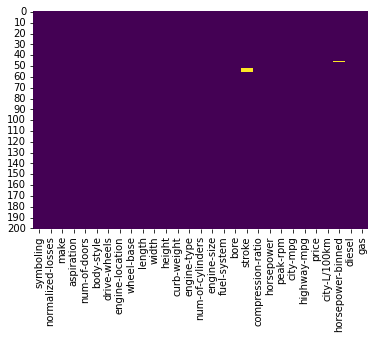

In [14]:
# identify if there is any missing data
# work it out as a percentage
print(df.isnull().sum() / len(df) *100)
sns.heatmap(data=df.isnull(), cbar=False, cmap='viridis')

In [15]:
# address the missing data in the stroke column by replacing it
# replace with mean of other mazda two door hatchback models
mean_stroke = df[df['make']=='mazda'].groupby(['aspiration','num-of-doors','body-style']).mean().reset_index()['stroke'][2]
df['stroke'].fillna(mean_stroke, inplace=True)

In [16]:
# horsepower-binned is just a repeat of the horsepower column
# hence this column will be dropped
df.drop('horsepower-binned', axis=1, inplace=True)

symboling            0.0
normalized-losses    0.0
make                 0.0
aspiration           0.0
num-of-doors         0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-type          0.0
num-of-cylinders     0.0
engine-size          0.0
fuel-system          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
city-L/100km         0.0
diesel               0.0
gas                  0.0
dtype: float64


<AxesSubplot:>

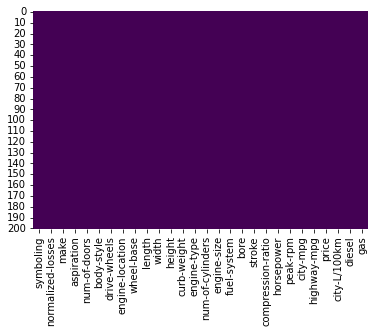

In [17]:
# identify if there is any missing data
# work it out as a percentage
print(df.isnull().sum() / len(df) *100)
sns.heatmap(data=df.isnull(), cbar=False, cmap='viridis')

All the missing values have been addressed, however there are still some columns which need dropping due to repeated information. Such as the Diesel and Gas columns, only one of these columns needs to remain otherwise it will be data leakage. Furthermore, city-L/100km is just a unit conversion of city-mpg so this will be dropped as well.

In [18]:
# drop columns with repeated information
df.drop(['gas', 'city-L/100km'], axis=1, inplace=True)

### Categorical Variables

There are a few categorical string variables in the dataset so these must be investigated and see if they can be converted into dummy variables.

In [19]:
# see which features are non-numeric
df.select_dtypes(include='object').columns

Index(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'],
      dtype='object')

In [20]:
# create a dataframe showing the number of unique values for each non-numeric column
df_nunique = pd.DataFrame({'Feature':df.select_dtypes(include='object').columns})
df_nunique['nunique'] = df_nunique['Feature'].apply(lambda x: df[x].nunique())
df_nunique

,Feature,nunique
0,make,22
1,aspiration,2
2,num-of-doors,2
3,body-style,5
4,drive-wheels,3
5,engine-location,2
6,engine-type,6
7,num-of-cylinders,7
8,fuel-system,8


None of the non-numeric feature columns have a significant number of unique values, so we can get away with converting all of them to dummy variables.

In [21]:
# convert all remaining non-numeric columns to dummy variables
# remember to set drop_first=True otherwise there will be data leakage
# furthermore remember to drop all origional columns
dummies = pd.get_dummies(
    df[['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']],
    drop_first=True)

df = pd.concat([df, dummies], axis=1)

df.drop(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'],
       axis=1, inplace=True)

In [22]:
# check the columns of df to ensure the coding has worked
print(len(df.columns))
df.columns

65


Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'diesel', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'aspiration_turbo',
       'num-of-doors_two', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_rear', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'engine-type_rotor', 'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylind

In [23]:
# furthermore, check there are no more non-numeric columns in the data
df.select_dtypes(include='object').columns

Index([], dtype='object')

All columns have now been converted to numeric columns so we can now continue with splitting and scaling the data.

## Section 4: Splitting the Data and Scaling

In [24]:
# set x and y before performing a train test split
# remember that for neural nets the inputs must be values cannot be dataframe
X = df.drop('price', axis=1).values
y = df['price'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
# now scale each split of the features
# instantiate StandardScaler
# train scaler
# transform the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
# save the scaler using pickle
with open('regression_scaler', 'wb') as file:
    pickle.dump(scaler, file)

In [27]:
# this is the code to load the scaler file using pickle
#with open('regression_scaler', 'rb') as scaler_file:
#    scaler = pickle.load(scaler_file)

## Section 5: Building the Artificial Neural Net Model

The neural net will resemble the following construction: *65--> 32--> 16--> 1*

A rectified linear unit (ReLU) activation will be used for all layers of the net seeing as the model is not a binary classification prediction.

The loss function will be mean squared error (MSE) seeing as it is a regression model.Furthmore, the optimizer used will be Adam seeing as this is generally the best performing optimizer.

Dropout layers help against overfitting on the training data. This involves a random percentage of nodes being switched off in a given layer each epoch. Dropout layers will be added to the input and the hidden layer but obviously not the output layer.

Lastly, early stopping will be implemented so that the model will stop as soon as the loss function reaches a minimum. This will save time on training the model.

In [28]:
# see how many inputs we have in the data
x_train.shape[1]

64

In [29]:
# creating an instance of Sequential()
model = Sequential()

# input layer
model.add(Dense(units=65, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 1
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 2
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation='relu'))

# now compile the model
# it is a regression model so the loss function will be mean squared error
model.compile(loss='mse', optimizer='adam')

In [30]:
# creating an early_stop variable to add into the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [31]:
# fit the model
model.fit(x_train, y_train, batch_size=3, epochs=500, verbose=1, callbacks=early_stop, validation_data=(x_test,y_test))

Epoch 1/500
54/54 [==============================] - 1s 5ms/step - loss: 257598720.0000 - val_loss: 157614144.0000
Epoch 2/500
54/54 [==============================] - 0s 2ms/step - loss: 257230512.0000 - val_loss: 157027936.0000
Epoch 3/500
54/54 [==============================] - 0s 2ms/step - loss: 255212752.0000 - val_loss: 154351456.0000
Epoch 4/500
54/54 [==============================] - 0s 2ms/step - loss: 246782112.0000 - val_loss: 145130704.0000
Epoch 5/500
54/54 [==============================] - 0s 2ms/step - loss: 222564528.0000 - val_loss: 124300048.0000
Epoch 6/500
54/54 [==============================] - 0s 2ms/step - loss: 174305568.0000 - val_loss: 88466456.0000
Epoch 7/500
54/54 [==============================] - 0s 2ms/step - loss: 110759088.0000 - val_loss: 51311108.0000
Epoch 8/500
54/54 [==============================] - 0s 2ms/step - loss: 58572056.0000 - val_loss: 28428726.0000
Epoch 9/500
54/54 [==============================] - 0s 3ms/step - loss: 34934724.00

54/54 [==============================] - 0s 2ms/step - loss: 9592958.0000 - val_loss: 4102990.5000
Epoch 74/500
54/54 [==============================] - 0s 2ms/step - loss: 16093427.0000 - val_loss: 4939185.0000
Epoch 75/500
54/54 [==============================] - 0s 2ms/step - loss: 15198370.0000 - val_loss: 4532085.5000
Epoch 76/500
54/54 [==============================] - 0s 2ms/step - loss: 10224904.0000 - val_loss: 3735798.2500
Epoch 77/500
54/54 [==============================] - 0s 2ms/step - loss: 9756254.0000 - val_loss: 3640917.0000
Epoch 78/500
54/54 [==============================] - 0s 2ms/step - loss: 10782120.0000 - val_loss: 4056254.7500
Epoch 79/500
54/54 [==============================] - 0s 2ms/step - loss: 13212370.0000 - val_loss: 3739499.0000
Epoch 80/500
54/54 [==============================] - 0s 2ms/step - loss: 14951205.0000 - val_loss: 6193189.0000
Epoch 81/500
54/54 [==============================] - 0s 2ms/step - loss: 9160254.0000 - val_loss: 5217232.5000

54/54 [==============================] - 0s 2ms/step - loss: 12373256.0000 - val_loss: 3008479.5000
Epoch 146/500
54/54 [==============================] - 0s 2ms/step - loss: 12501217.0000 - val_loss: 3913739.2500
Epoch 00146: early stopping


In [32]:
# save the neural net model
model.save('ANN Regression Model.h5')

In [33]:
# option to load the model
#model = load_model('ANN Regression Model.h5')

## Section 6: Evaluate Model Performance

In [34]:
# save both the training loss and the validation loss and put them into a dataframe
df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,257598720.0,157614144.0
1,257230512.0,157027936.0
2,255212752.0,154351456.0
3,246782112.0,145130704.0
4,222564528.0,124300048.0


<AxesSubplot:>

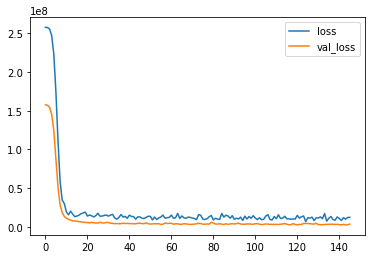

In [35]:
# visualise the loss results
df_loss.plot()

In [36]:
# extracting preictions using x_test from the model
yhat = model.predict(x_test)
yhat

array([[ 8279.18  ],
       [ 6844.636 ],
       [ 7936.4463],
       [11228.667 ],
       [ 5433.5513],
       [18155.643 ],
       [12376.914 ],
       [ 8929.196 ],
       [ 7619.5835],
       [11340.332 ],
       [ 7067.451 ],
       [10562.584 ],
       [ 6914.015 ],
       [ 5993.3584],
       [ 7042.5464],
       [ 8523.796 ],
       [10894.158 ],
       [ 5402.651 ],
       [14506.719 ],
       [ 8124.3765],
       [ 6427.625 ],
       [17906.014 ],
       [13913.335 ],
       [ 5340.279 ],
       [ 4669.569 ],
       [25707.668 ],
       [ 5798.567 ],
       [10116.956 ],
       [ 7151.23  ],
       [ 6098.404 ],
       [13169.054 ],
       [15049.781 ],
       [19950.246 ],
       [ 5229.0005],
       [ 6382.6445],
       [ 7110.9595],
       [24900.611 ],
       [ 6157.8755],
       [ 8204.711 ],
       [ 8274.294 ],
       [ 6229.9106]], dtype=float32)

In [37]:
# calculating mean absolute error
mean_absolute_error(y_test, yhat)

1520.2045541158536

In [38]:
# calculate square root of mean squared error
np.sqrt(mean_squared_error(y_test, yhat))

1978.3173728122838

In [39]:
# calculate explained variance score
explained_variance_score(y_test, yhat)

0.927917324984951

In [40]:
# compare these values with the mean of the price column
df['price'].mean()

13207.129353233831

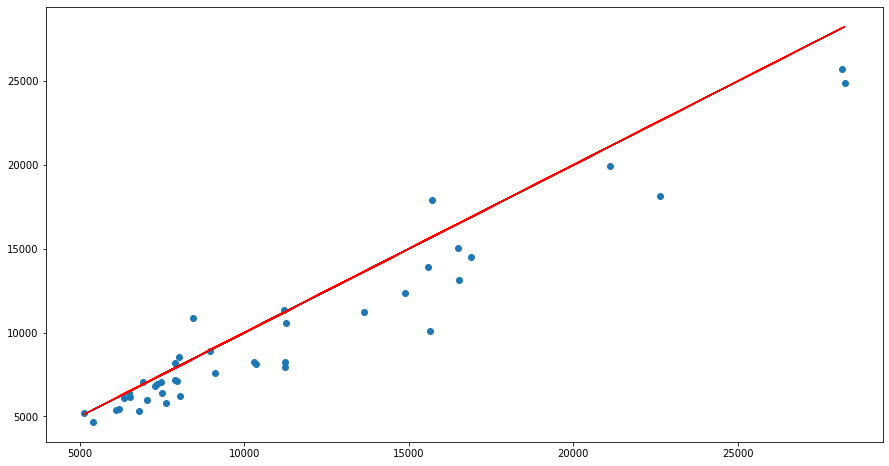

In [41]:
# visualise the predictions against perfect predictions
plt.figure(figsize=[15,8])
plt.scatter(y_test, yhat)

# perfect predictions
plt.plot(y_test, y_test, 'r')

C:\Python_Projects\virtual_environment_jupyter_MSX\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

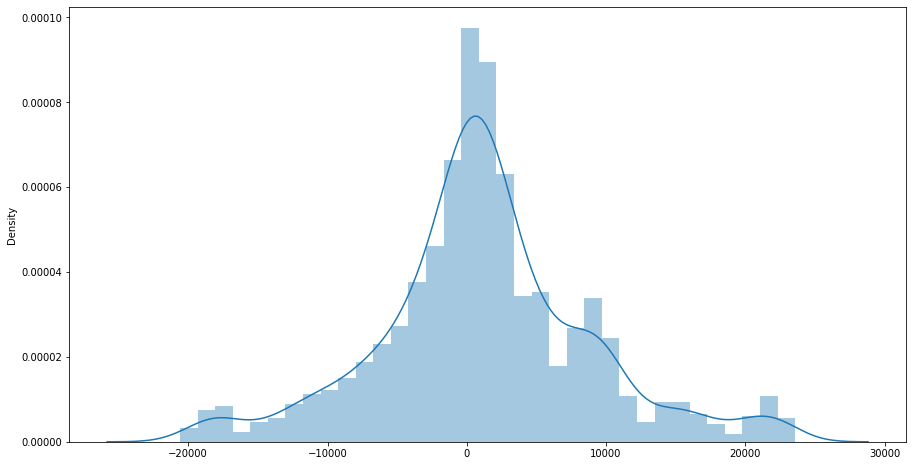

In [42]:
# caluclate difference between true values and predictions
errors = y_test.reshape(1,-1) - yhat

# visualise with a distribution
plt.figure(figsize=[15,8])
sns.distplot(errors)

### Predicting a brand new vehicle

In [43]:
single_car = df.drop('price', axis=1).iloc[4].values.reshape(1,-1)
single_car

array([[2.00000000e+00, 1.64000000e+02, 9.94000000e+01, 8.48630466e-01,
        9.22222222e-01, 5.43000000e+01, 2.82400000e+03, 1.36000000e+02,
        3.19000000e+00, 3.40000000e+00, 8.00000000e+00, 1.15000000e+02,
        5.50000000e+03, 1.80000000e+01, 2.20000000e+01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [44]:
# scale the inputs
single_car = scaler.transform(single_car)
single_car

array([[ 0.85895569,  1.23376475,  0.06038847,  0.1187995 ,  0.16670884,
         0.22186575,  0.45458471,  0.14360459, -0.5661176 ,  0.44101926,
        -0.53293195,  0.22252388,  0.78381423, -1.03365219, -1.18039675,
        -0.33333333,  5.06622805, -0.21389632, -0.1382327 , -0.21389632,
        -0.21389632, -0.07930516, -0.1382327 , -0.29738086, -0.19738551,
        -0.07930516, -0.27170849, -0.33333333, -0.24413654, -0.21389632,
        -0.16012815, -0.11250879, -0.19738551, -0.21389632, -0.388689  ,
        -0.2847474 , -0.24413654, -0.47050403, -0.85972695, -0.1796053 ,
        -0.69388867,  1.01257911, -0.3560345 , -1.20894105, -0.77459667,
        -0.1382327 , -0.25819889,  0.62554324, -0.25819889, -0.2847474 ,
        -0.11250879,  4.35889894, -1.82327297, -0.388689  , -0.07930516,
        -0.07930516, -0.11250879, -0.64492573, -0.11250879, -0.33333333,
        -0.07930516,  1.01257911, -0.22941573, -0.07930516]])

In [45]:
# use the model to predict the house price
model.predict(single_car)[0][0]

16377.061

In [46]:
# check the prediction against the real value
df.iloc[4]['price']

17450.0

In [47]:
# percentage error
(1 - model.predict(single_car)[0][0] / df.iloc[4]['price']) * 100

6.148650161174785